In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
im_bgr = cv2.imread('lane1.jpg')
im_gray = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2GRAY)

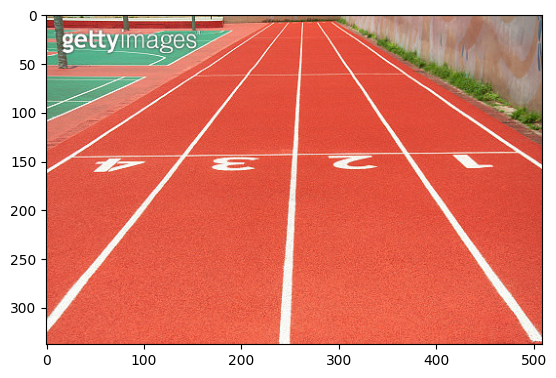

In [4]:
plt.imshow(im_bgr[:,:,::-1])

In [5]:
im_gray = cv2.GaussianBlur(im_gray, ksize = (13,13), sigmaX= 2.0)
Tlow = 50
Thigh = 150
im_edge = cv2.Canny(im_gray, Tlow, Thigh, apertureSize = 3)

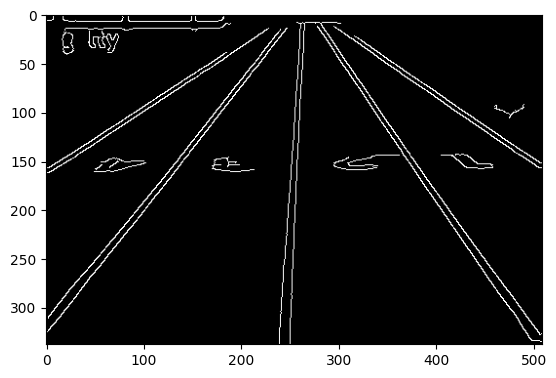

In [7]:
plt.imshow(im_edge, cmap ='gray')

In [14]:
im_hough1 = im_bgr.copy()
T = 200
lines = cv2.HoughLines(im_edge, 1, np.pi/180, T) 
print(lines)

[[[-224.           2.5481806]]

 [[ 203.           0.6632251]]

 [[-217.           2.5132742]]

 [[ 200.           0.6981317]]

 [[ 198.           0.6806784]]]


In [15]:
for i, line in enumerate(lines):
    
    rho,theta = line[0]     # rho and theta
    print(i, rho, theta*180./np.pi)
    #  note: 수업에서는  y cos(theta) + x sin(theta) = rho
    #        그런데, slide_theta = opencv_theta - 90 이므로
    #        x cos (opencv_theta)  + y cos (opencv_theta) = rho 가 됨.    
   
    a = np.cos(theta)         
    b = np.sin(theta)
    x0 = a*rho              # 수직교점 
    y0 = b*rho
    t = 1000
    x1 = int(x0 + t*(-b))    
    y1 = int(y0 + t*(a))
    x2 = int(x0 - t*(-b))
    y2 = int(y0 - t*(a))
    if  rho > 0 and theta < np.pi/2.:
        print('postive rho, theta < 90')
        cv2.line(im_hough1,(x1,y1),(x2,y2),(255,0,0),1) # blue
    elif rho > 0 and theta > np.pi/2.:
        print('postive rho, theta > 90')
        cv2.line(im_hough1,(x1,y1),(x2,y2),(0,0,255),1) # red
    elif rho < 0 and theta < np.pi/2.:
        print('negative rho, theta < 90')
        cv2.line(im_hough1,(x1,y1),(x2,y2),(0,255,0),1) # green
    elif rho < 0 and theta > np.pi/2.:
        print('negative rho, theta > 90 ')
        cv2.line(im_hough1,(x1,y1),(x2,y2),(0,0,0),1) # black

0 -224.0 145.99999267917153
negative rho, theta > 90 
1 203.0 37.999999919081475
postive rho, theta < 90
2 -217.0 144.00000400716507
negative rho, theta > 90 
3 200.0 39.99999883637168
postive rho, theta < 90
4 198.0 39.00000108527387
postive rho, theta < 90


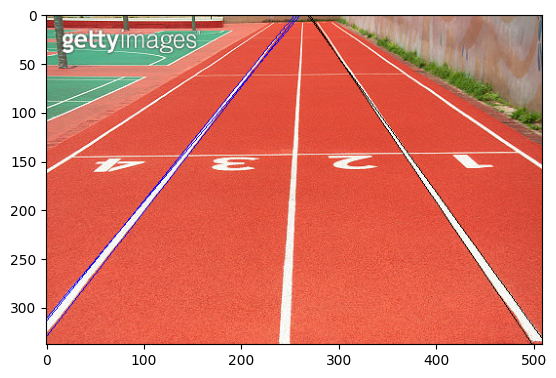

In [16]:
plt.imshow(im_hough1[:,:,::-1])

In [20]:
minLineLength = 100
maxLineGap = 20
T = 100
lines = cv2.HoughLinesP(im_edge, 1, np.pi/180, T, minLineLength, maxLineGap)
print(lines)

[[[ 90 214 210  61]]

 [[372 151 417 217]]

 [[384 160 428 220]]

 [[ 66 233 117 171]]

 [[  3 157  69 114]]

 [[391  78 416  96]]

 [[ 51 262  87 217]]

 [[255 213 256 176]]

 [[ 44 259  69 229]]

 [[163  58 187  42]]

 [[428 221 454 257]]

 [[153 126 214  49]]

 [[ 79 113 108  94]]

 [[297  13 388  77]]

 [[409  86 507 152]]

 [[344 110 366 142]]

 [[ 89  14 148  14]]

 [[ 31   7  77   7]]

 [[285  15 360 125]]

 [[363 130 386 161]]

 [[188  41 217  22]]

 [[ 42 137  76 115]]

 [[376  63 399  79]]

 [[414  95 440 113]]

 [[295  38 309  58]]

 [[432 239 450 264]]

 [[131  79 158  61]]

 [[459 263 507 328]]]


In [21]:
im_hough2 = im_bgr.copy()
for i, line in enumerate(lines):
    print(i, line)
    x1,y1,x2,y2 = line[0]
    cv2.line(im_hough2,(x1,y1),(x2,y2),(255,0,0),2)

0 [[ 90 214 210  61]]
1 [[372 151 417 217]]
2 [[384 160 428 220]]
3 [[ 66 233 117 171]]
4 [[  3 157  69 114]]
5 [[391  78 416  96]]
6 [[ 51 262  87 217]]
7 [[255 213 256 176]]
8 [[ 44 259  69 229]]
9 [[163  58 187  42]]
10 [[428 221 454 257]]
11 [[153 126 214  49]]
12 [[ 79 113 108  94]]
13 [[297  13 388  77]]
14 [[409  86 507 152]]
15 [[344 110 366 142]]
16 [[ 89  14 148  14]]
17 [[31  7 77  7]]
18 [[285  15 360 125]]
19 [[363 130 386 161]]
20 [[188  41 217  22]]
21 [[ 42 137  76 115]]
22 [[376  63 399  79]]
23 [[414  95 440 113]]
24 [[295  38 309  58]]
25 [[432 239 450 264]]
26 [[131  79 158  61]]
27 [[459 263 507 328]]


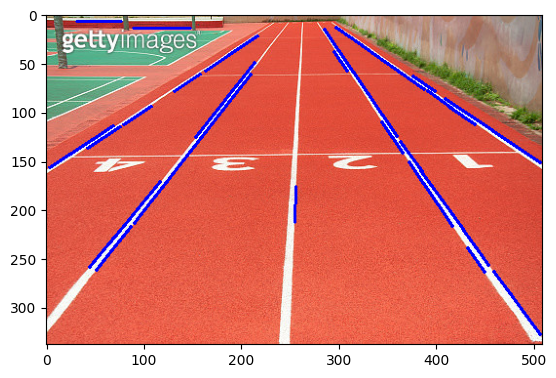

In [22]:
plt.imshow(im_hough2[:,:,::-1])